# OBJECTIVE

### Context
The Challenge - One challenge of modeling retail data is the need to make decisions based on limited history. Holidays and select major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales – the challenge is to predict which departments will be affected and to what extent.

### Content
You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

Within the Excel Sheet, there are 3 Tabs – Stores, Features and Sales

### The Task
1. Predict the department-wide sales for each store for the following year
2. Model the effects of markdowns on holiday weeks
3. Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact

# Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

### Sales
Historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this tab you will find the following fields:

+ Store - the store number
+ Dept - the department number
+ Date - the week
+ Weekly_Sales -  sales for the given department in the given store
+ IsHoliday - whether the week is a special holiday week

In [2]:
sales = pd.read_csv('resources/sales data-set.csv')
print("Sales Total Col.",len(sales.columns),"\nShape:",sales.shape)

Sales Total Col. 5 
Shape: (421570, 5)


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [4]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [5]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


### Stores
Anonymized information about the 45 stores, indicating the type and size of store

In [6]:
stores = pd.read_csv('resources/stores data-set.csv')
print("Stores Total Col.",len(stores.columns),"\nShape:",stores.shape)

Stores Total Col. 3 
Shape: (45, 3)


In [7]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [9]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


### Features
Contains additional data related to the store, department, and regional activity for the given dates.

+ Store - the store number
+ Date - the week
+ Temperature - average temperature in the region
+ Fuel_Price - cost of fuel in the region
+ MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
+ CPI - the consumer price index
+ Unemployment - the unemployment rate
+ IsHoliday - whether the week is a special holiday week

In [10]:
features = pd.read_csv('resources/Features data set.csv')
print("Features Total Col.",len(features.columns),"\nShape:",features.shape)

Features Total Col. 12 
Shape: (8190, 12)


In [11]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [13]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


# Analysing and Merging Data

In [14]:
sales.loc[sales['Store'] == 1]

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
10239,1,99,31/08/2012,20.06,False
10240,1,99,07/09/2012,0.05,True
10241,1,99,14/09/2012,0.03,False
10242,1,99,05/10/2012,635.00,False


In [15]:
features.loc[features['Store'] == 1]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
177,1,28/06/2013,83.94,3.495,4205.98,796.70,6.84,3816.78,4812.74,NaN,NaN,False
178,1,05/07/2013,79.85,3.422,7649.99,3503.29,1766.77,9454.96,1079.89,NaN,NaN,False
179,1,12/07/2013,83.12,3.400,6089.94,1362.42,209.62,2367.42,2651.05,NaN,NaN,False
180,1,19/07/2013,79.26,3.556,3117.04,1060.39,199.05,1012.30,5381.72,NaN,NaN,False


In [16]:
sales.loc[(sales['Store'] == 1) & (sales['Date'] == '05/02/2010') & (sales['IsHoliday'] == False)]

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
143,1,2,05/02/2010,50605.27,False
286,1,3,05/02/2010,13740.12,False
429,1,4,05/02/2010,39954.04,False
572,1,5,05/02/2010,32229.38,False
...,...,...,...,...,...
9370,1,93,05/02/2010,64494.87,False
9513,1,94,05/02/2010,56655.39,False
9656,1,95,05/02/2010,106690.06,False
9921,1,97,05/02/2010,32153.04,False


In [17]:
features.loc[(features['Store'] == 1) & (features['Date'] == '05/02/2010') & (features['IsHoliday'] == False)]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [18]:
data = sales.merge(features,how="left", on=['Store', 'Date', 'IsHoliday'])
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [19]:
data.loc[(data['Store'] == 1) & (data['Date'] == '05/02/2010') & (data['IsHoliday'] == False)]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
143,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
286,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
429,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
572,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,1,93,05/02/2010,64494.87,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
9513,1,94,05/02/2010,56655.39,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
9656,1,95,05/02/2010,106690.06,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
9921,1,97,05/02/2010,32153.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [20]:
stores.loc[stores['Store'] == 1]

,Store,Type,Size
0,1,A,151315


In [21]:
data = data.merge(stores, how= "left", on=['Store'])
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [22]:
data.loc[(data['Store'] == 1) & (data['Date'] == '05/02/2010') & (data['IsHoliday'] == False)]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
143,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
286,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
429,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
572,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,1,93,05/02/2010,64494.87,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
9513,1,94,05/02/2010,56655.39,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
9656,1,95,05/02/2010,106690.06,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
9921,1,97,05/02/2010,32153.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [23]:
intialData = data
print("Total Col. of final data ",len(data.columns),"\nShape:",data.shape,"\nColumns",data.columns.tolist())

Total Col. of final data  16 
Shape: (421570, 16) 
Columns ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']


In [24]:
print("Total Col. of data ",len(intialData.columns),"\nShape:",intialData.shape,"\nColumns",intialData.columns.tolist())

Total Col. of data  16 
Shape: (421570, 16) 
Columns ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']


# Explore Data 

## Numerical Data

#### find the numerical variables

In [25]:
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables : \n'.format(len(numerical)), numerical)

There are 14 numerical variables : 
 ['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']


In [26]:
# view the numerical variables
data[numerical].head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
0,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315
1,1,1,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,151315
2,1,1,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,151315
3,1,1,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,151315
4,1,1,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,151315


#### check and replacing missing values in numerical variables

In [27]:
data[numerical].isnull().sum()

Store                0
Dept                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Size                 0
dtype: int64

In [28]:
# Replace NaN with default values
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan,strategy='constant', fill_value = 0) 
imputer.fit(data[numerical]) 
data[numerical]=imputer.transform(data[numerical])
data[numerical].isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Size            0
dtype: int64

In [29]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


In [30]:
#verify numerical variables 
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables : \n'.format(len(numerical)), numerical)

There are 14 numerical variables : 
 ['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']


### check for outliers

In [31]:
# view summary statistics in numerical variables to check for outliers
print(round(data[numerical].describe()),2)

          Store      Dept  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
count  421570.0  421570.0      421570.0     421570.0    421570.0   421570.0   
mean       22.0      44.0       15981.0         60.0         3.0     2590.0   
std        13.0      30.0       22711.0         18.0         0.0     6052.0   
min         1.0       1.0       -4989.0         -2.0         2.0        0.0   
25%        11.0      18.0        2080.0         47.0         3.0        0.0   
50%        22.0      37.0        7612.0         62.0         3.0        0.0   
75%        33.0      74.0       20206.0         74.0         4.0     2809.0   
max        45.0      99.0      693099.0        100.0         4.0    88647.0   

       MarkDown2  MarkDown3  MarkDown4  MarkDown5       CPI  Unemployment  \
count   421570.0   421570.0   421570.0   421570.0  421570.0      421570.0   
mean       880.0      468.0     1083.0     1663.0     171.0           8.0   
std       5085.0     5529.0     3895.0     4208.0      39

Inference: 
+ Outlier noticed for Weekly_Sales and MarkDowns   

Text(0, 0.5, 'MarkDown5')

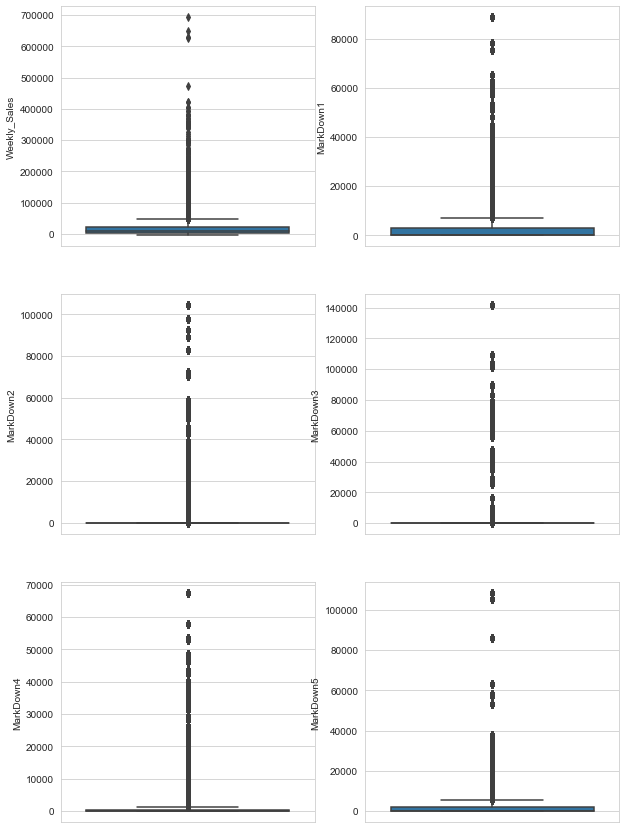

In [32]:
# plot box plot to check outliers
plt.figure(figsize=(10,15))

plt.subplot(3, 2, 1)
fig = sns.boxplot(y=data['Weekly_Sales'])
fig.set_ylabel('Weekly_Sales')

plt.subplot(3, 2, 2)
fig = sns.boxplot(y=data["MarkDown1"])
fig.set_ylabel('MarkDown1')

plt.subplot(3, 2, 3)
fig = sns.boxplot(y=data['MarkDown2'])
fig.set_ylabel('MarkDown2')

plt.subplot(3, 2, 4)
fig = sns.boxplot(y=data['MarkDown3'])
fig.set_ylabel('MarkDown3')

plt.subplot(3, 2, 5)
fig = sns.boxplot(y=data['MarkDown4'])
fig.set_ylabel('MarkDown4')

plt.subplot(3, 2, 6)
fig = sns.boxplot(y=data['MarkDown5'])
fig.set_ylabel('MarkDown5')

Text(0.5, 0, 'Date')

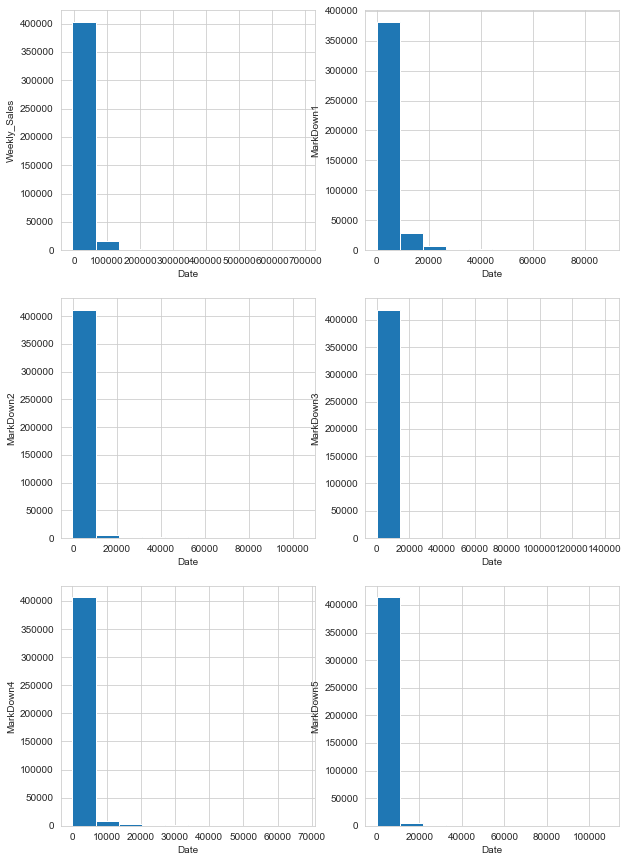

In [33]:
# plot histogram to check distribution
plt.figure(figsize=(10,15))

plt.subplot(3, 2, 1)
fig = data.Weekly_Sales.hist(bins=10)
fig.set_ylabel('Weekly_Sales')
fig.set_xlabel('Date')

plt.subplot(3, 2, 2)
fig = data.MarkDown1.hist(bins=10)
fig.set_ylabel('MarkDown1')
fig.set_xlabel('Date')

plt.subplot(3, 2, 3)
fig = data.MarkDown2.hist(bins=10)
fig.set_ylabel('MarkDown2')
fig.set_xlabel('Date')

plt.subplot(3, 2, 4)
fig = data.MarkDown3.hist(bins=10)
fig.set_ylabel('MarkDown3')
fig.set_xlabel('Date')

plt.subplot(3, 2, 5)
fig = data.MarkDown4.hist(bins=10)
fig.set_ylabel('MarkDown4')
fig.set_xlabel('Date')

plt.subplot(3, 2, 6)
fig = data.MarkDown5.hist(bins=10)
fig.set_ylabel('MarkDown5')
fig.set_xlabel('Date')

In [34]:
# find outliers for Weekly_Sales variable
IQR = data.Weekly_Sales.quantile(0.75) - data.Weekly_Sales.quantile(0.25)
Weekly_Sales_Lower_fence = data.Weekly_Sales.quantile(0.25) - (IQR * 3)
Weekly_Sales_Upper_fence = data.Weekly_Sales.quantile(0.75) + (IQR * 3)
print('Outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Weekly_Sales_Lower_fence, upperboundary=Weekly_Sales_Upper_fence))

Outliers are values < -52298.9575 or > 74584.45999999999


In [35]:
print('Number of outliers below lower boundary = {} and those above upper boundary = {}'. format(data[ (data.Weekly_Sales< Weekly_Sales_Lower_fence)]['Weekly_Sales'].count(), data[(data.Weekly_Sales> Weekly_Sales_Upper_fence)]['Weekly_Sales'].count()))

Number of outliers below lower boundary = 0 and those above upper boundary = 12830


In [36]:
# find outliers for MarkDown1 variable
IQR = data.MarkDown1.quantile(0.75) - data.MarkDown1.quantile(0.25)
MarkDown1_Lower_fence = data.MarkDown1.quantile(0.25) - (IQR * 3)
MarkDown1_Upper_fence = data.MarkDown1.quantile(0.75) + (IQR * 3)
print('Outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=MarkDown1_Lower_fence, upperboundary=MarkDown1_Upper_fence))

Outliers are values < -8427.150000000001 or > 11236.2


In [37]:
print('Number of outliers below lower boundary = {} and those above upper boundary = {}'. format(data[ (data.MarkDown1< MarkDown1_Lower_fence)]['MarkDown1'].count(), data[(data.MarkDown1> MarkDown1_Upper_fence)]['MarkDown1'].count()))

Number of outliers below lower boundary = 0 and those above upper boundary = 26162


In [38]:
# find outliers for MarkDown2 variable
IQR = data.MarkDown2.quantile(0.75) - data.MarkDown2.quantile(0.25)
MarkDown2_Lower_fence = data.MarkDown2.quantile(0.25) - (IQR * 3)
MarkDown2_Upper_fence = data.MarkDown2.quantile(0.75) + (IQR * 3)
print('Outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=MarkDown2_Lower_fence, upperboundary=MarkDown2_Upper_fence))

Outliers are values < -6.6000000000000005 or > 8.8


In [39]:
print('Number of outliers below lower boundary = {} and those above upper boundary = {}'. format(data[ (data.MarkDown2< MarkDown2_Lower_fence)]['MarkDown2'].count(), data[(data.MarkDown2> MarkDown2_Upper_fence)]['MarkDown2'].count()))

Number of outliers below lower boundary = 755 and those above upper boundary = 98203


In [40]:
# find outliers for MarkDown3 variable
IQR = data.MarkDown3.quantile(0.75) - data.MarkDown3.quantile(0.25)
MarkDown3_Lower_fence = data.MarkDown3.quantile(0.25) - (IQR * 3)
MarkDown3_Upper_fence = data.MarkDown3.quantile(0.75) + (IQR * 3)
print('Outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=MarkDown3_Lower_fence, upperboundary=MarkDown3_Upper_fence))

Outliers are values < -13.620000000000001 or > 18.16


In [41]:
print('Number of outliers below lower boundary = {} and those above upper boundary = {}'. format(data[ (data.MarkDown3< MarkDown3_Lower_fence)]['MarkDown3'].count(), data[(data.MarkDown3> MarkDown3_Upper_fence)]['MarkDown3'].count()))

Number of outliers below lower boundary = 72 and those above upper boundary = 75124


In [42]:
# find outliers for MarkDown1 variable
IQR = data.MarkDown4.quantile(0.75) - data.MarkDown4.quantile(0.25)
MarkDown4_Lower_fence = data.MarkDown4.quantile(0.25) - (IQR * 3)
MarkDown4_Upper_fence = data.MarkDown4.quantile(0.75) + (IQR * 3)
print('Outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=MarkDown4_Lower_fence, upperboundary=MarkDown4_Upper_fence))

Outliers are values < -1275.8700000000001 or > 1701.16


In [43]:
print('Number of outliers below lower boundary = {} and those above upper boundary = {}'. format(data[ (data.MarkDown4< MarkDown4_Lower_fence)]['MarkDown4'].count(), data[(data.MarkDown4> MarkDown4_Upper_fence)]['MarkDown4'].count()))

Number of outliers below lower boundary = 0 and those above upper boundary = 61565


In [44]:
# find outliers for MarkDown5 variable
IQR = data.MarkDown1.quantile(0.75) - data.MarkDown5.quantile(0.25)
MarkDown5_Lower_fence = data.MarkDown5.quantile(0.25) - (IQR * 3)
MarkDown5_Upper_fence = data.MarkDown5.quantile(0.75) + (IQR * 3)
print('Outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=MarkDown5_Lower_fence, upperboundary=MarkDown5_Upper_fence))

Outliers are values < -8427.150000000001 or > 10595.190000000002


In [45]:
print('Number of outliers below lower boundary = {} and those above upper boundary = {}'. format(data[ (data.MarkDown5< MarkDown5_Lower_fence)]['MarkDown5'].count(), data[(data.MarkDown5> MarkDown5_Upper_fence)]['MarkDown5'].count()))

Number of outliers below lower boundary = 0 and those above upper boundary = 8212


Inference: 
+ Sales might hike during holidays which will cause these outliers. Due to which I will not be removing these outliers during prediction.

### Check for duplicate values

In [46]:
print("Duplicate Values : ",data.duplicated().sum())

Duplicate Values :  0


## Categorical Data

### find categorical variables

In [47]:
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables : \n'.format(len(categorical)), categorical)

There are 2 categorical variables : 
 ['Date', 'Type']


In [48]:
# view the categorical variables
data[categorical].head()

,Date,Type
0,05/02/2010,A
1,12/02/2010,A
2,19/02/2010,A
3,26/02/2010,A
4,05/03/2010,A


In [49]:
data['Date']= pd.to_datetime(data['Date'], infer_datetime_format=True)  

### check and print categorical variables containing missing values

In [50]:
nullCategorical = [var for var in categorical if data[var].isnull().sum()!=0]
print(data[nullCategorical].isnull().sum())

Series([], dtype: float64)


### check for cardinality in categorical variables

In [51]:
for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

Date  contains  143  labels
Type  contains  3  labels


# Data Analysis

### Seasonality vs Trend Analysis

In [52]:
# average sales for all store/department per week
average_sales_per_week = data.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
average_sales_per_week.head()

,Date,Weekly_Sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13


In [53]:
# sort by date 
average_sales_per_week= average_sales_per_week.sort_values('Date', ascending=True)
average_sales_per_week.head()

,Date,Weekly_Sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13


In [54]:
# average sales for all store/department per week split on holiday
average_sales_per_week_n = data.groupby(by=['Date','IsHoliday'], as_index=False)['Weekly_Sales'].sum()
average_sales_per_week_n.head()

,Date,IsHoliday,Weekly_Sales
0,2010-01-10,False,42239875.87
1,2010-02-04,False,50423831.26
2,2010-02-07,False,48917484.50
3,2010-02-19,False,48276993.78
4,2010-02-26,False,43968571.13


In [55]:
# sort by date 
average_sales_per_week_n= average_sales_per_week_n.sort_values('Date', ascending=True)
average_sales_per_week_n.head()

,Date,IsHoliday,Weekly_Sales
0,2010-01-10,False,42239875.87
1,2010-02-04,False,50423831.26
2,2010-02-07,False,48917484.50
3,2010-02-19,False,48276993.78
4,2010-02-26,False,43968571.13


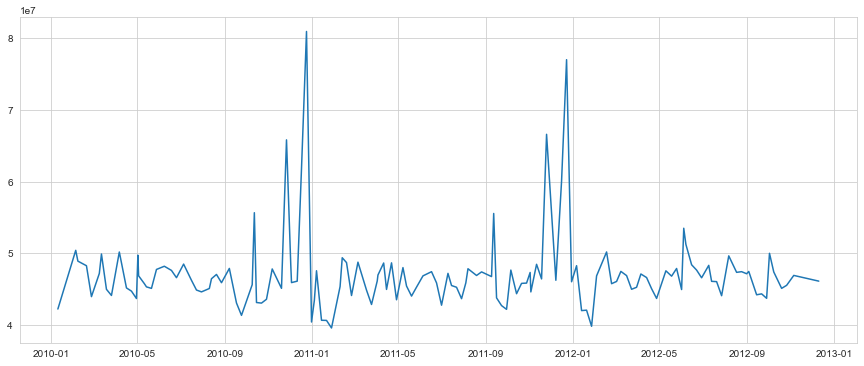

In [56]:
# plot average sales for all store/department per week
plt.figure(figsize=(15,6))
plt.plot(average_sales_per_week.Date, average_sales_per_week.Weekly_Sales)
plt.show()

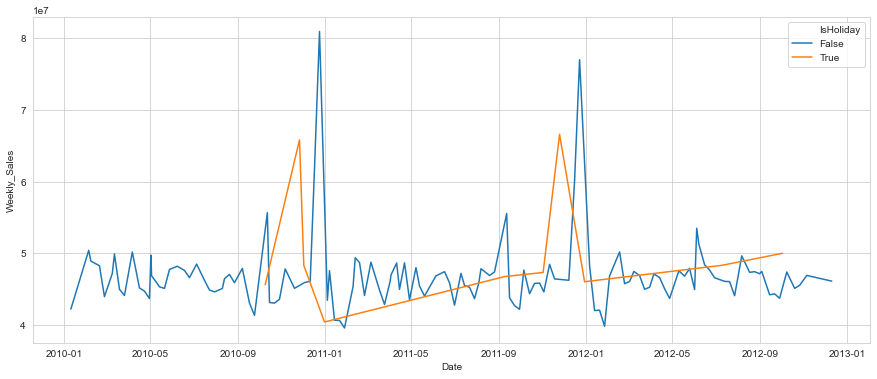

In [57]:
# plot average sales for all store/department per week split by holiday
plt.figure(figsize=(15,6))
sns.lineplot(data=average_sales_per_week_n, x="Date", y="Weekly_Sales", hue="IsHoliday")

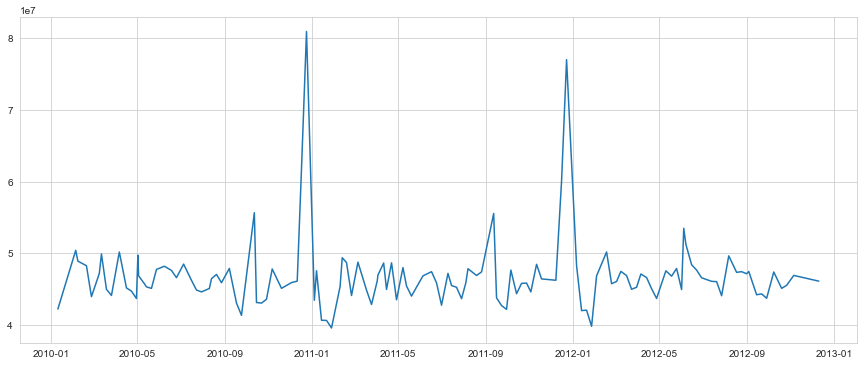

In [58]:
# plot average sales for all store/department per week when IsHoliday = False
plt.figure(figsize=(15,6))
plt.plot(average_sales_per_week_n[(average_sales_per_week_n.IsHoliday==False)]['Date'], average_sales_per_week_n[(average_sales_per_week_n.IsHoliday==False)]['Weekly_Sales'])
plt.show()

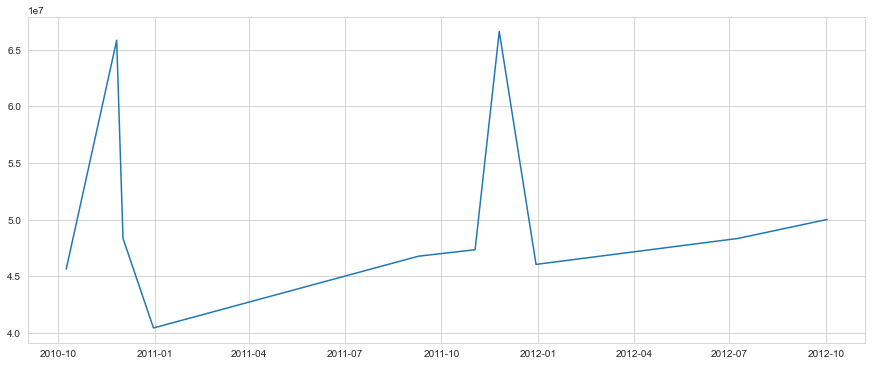

In [59]:
# plot average sales for all store/department per week when IsHoliday = True
plt.figure(figsize=(15,6))
plt.plot(average_sales_per_week_n[(average_sales_per_week_n.IsHoliday==True)]['Date'], average_sales_per_week_n[(average_sales_per_week_n.IsHoliday==True)]['Weekly_Sales'])
plt.show()

Inference :
+ Nov- Dec shows spike in Weekly Sales.The sales total has not increased over year.
+ Weeks near holiday shows peak in sales.

### Year/Month wise sales Analysis

In [60]:
# create a dataframe with only date and weekly sales details
average_sales_per_date = data.loc[:, ('Date','Weekly_Sales')]
average_sales_per_date['Month'] =pd.DatetimeIndex(average_sales_per_date['Date']).month
average_sales_per_date['Year'] =pd.DatetimeIndex(average_sales_per_date['Date']).year
average_sales_per_date.head()

,Date,Weekly_Sales,Month,Year
0,2010-05-02,24924.50,5,2010
1,2010-12-02,46039.49,12,2010
2,2010-02-19,41595.55,2,2010
3,2010-02-26,19403.54,2,2010
4,2010-05-03,21827.90,5,2010


In [61]:
# get sales per month 
average_sales_per_month = average_sales_per_date.groupby(by=['Month'], as_index=False)['Weekly_Sales'].sum()
average_sales_per_month.head()

,Month,Weekly_Sales
0,1,4.264263e+08
1,2,5.220257e+08
2,3,5.534864e+08
3,4,6.453239e+08
4,5,6.056966e+08


In [62]:
# sort by month 
average_sales_per_month= average_sales_per_month.sort_values('Month', ascending=True)
average_sales_per_month.head()

,Month,Weekly_Sales
0,1,4.264263e+08
1,2,5.220257e+08
2,3,5.534864e+08
3,4,6.453239e+08
4,5,6.056966e+08


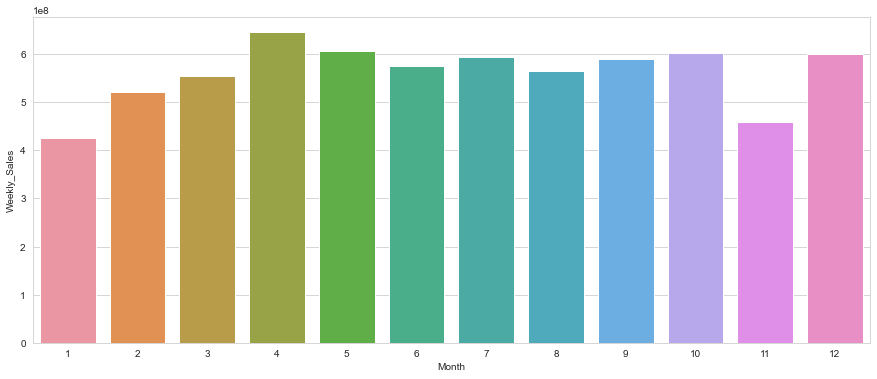

In [63]:
# plot average sales for all store/department per week
plt.figure(figsize=(15,6))
sns.barplot(x=average_sales_per_month.Month, y=average_sales_per_month.Weekly_Sales)

In [64]:
# get sales per year 
average_sales_per_year = average_sales_per_date.groupby(by=['Year'], as_index=False)['Weekly_Sales'].sum()
average_sales_per_year.head()

,Year,Weekly_Sales
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


In [65]:
# sort by year 
average_sales_per_year= average_sales_per_year.sort_values('Year', ascending=True)
average_sales_per_year.head()

,Year,Weekly_Sales
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


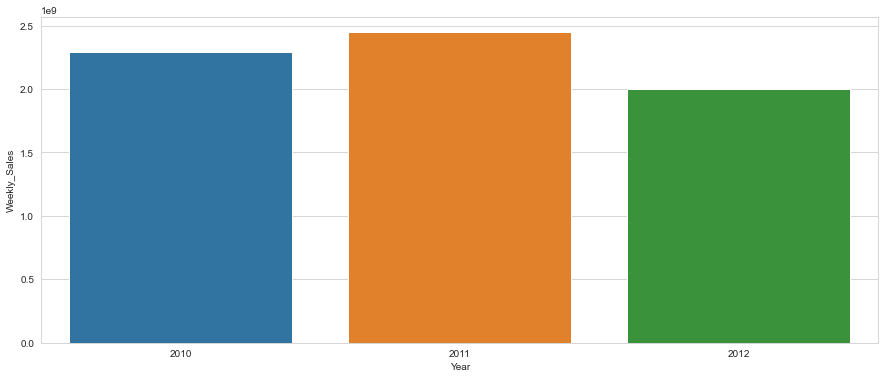

In [66]:
# plot total sales for all store/department per week
plt.figure(figsize=(15,6))
sns.barplot(x=average_sales_per_year.Year, y=average_sales_per_year.Weekly_Sales)

In [67]:
print('The data is from {} till {}'.format(data['Date'].min(), data['Date'].max()))

The data is from 2010-01-10 00:00:00 till 2012-12-10 00:00:00


Inference : 
+ Low sales shown in above bar graphs for the month of December and for the year 2012 could be due to the incomplete December month sales data for the year 2012.
+ There is hike in sales during holidays (Black friday Sales,Chrismas,New year). 
+ People tend to buy less during the months of January and November. 

### Store wise Analysis

In [68]:
# Sales for all store/department based on store type
sales_per_store_type = data.groupby(by=['Type'], as_index=False)['Weekly_Sales'].sum()
sales_per_store_type.head()

,Type,Weekly_Sales
0,A,4.331015e+09
1,B,2.000701e+09
2,C,4.055035e+08


In [69]:
# average sales for all store/department per week split on store type
sales_per_store_type_n = data.groupby(by=['Date','Type'], as_index=False)['Weekly_Sales'].sum()
sales_per_store_type_n.head()

,Date,Type,Weekly_Sales
0,2010-01-10,A,27265424.16
1,2010-01-10,B,12200056.75
2,2010-01-10,C,2774394.96
3,2010-02-04,A,32314949.92
4,2010-02-04,B,15299670.32


In [70]:
# sort by date 
sales_per_store_type_n= sales_per_store_type_n.sort_values('Date', ascending=True)
sales_per_store_type_n.head()

,Date,Type,Weekly_Sales
0,2010-01-10,A,27265424.16
1,2010-01-10,B,12200056.75
2,2010-01-10,C,2774394.96
3,2010-02-04,A,32314949.92
4,2010-02-04,B,15299670.32


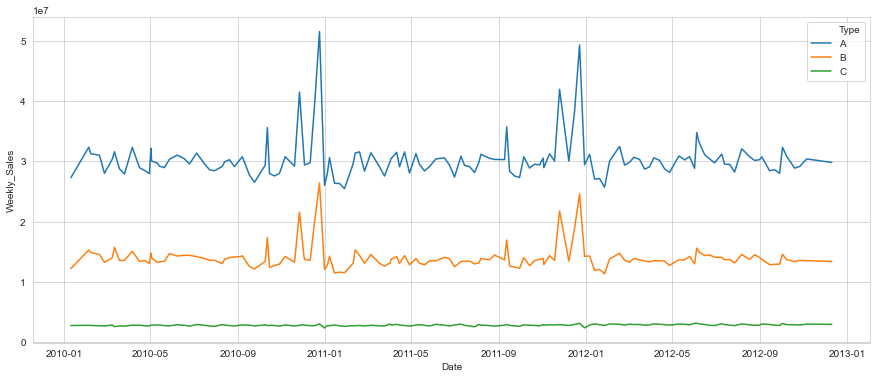

In [71]:
# plot average sales for all store/department per week split on store type
plt.figure(figsize=(15,6))
sns.lineplot(data=sales_per_store_type_n, x="Date", y="Weekly_Sales", hue="Type")

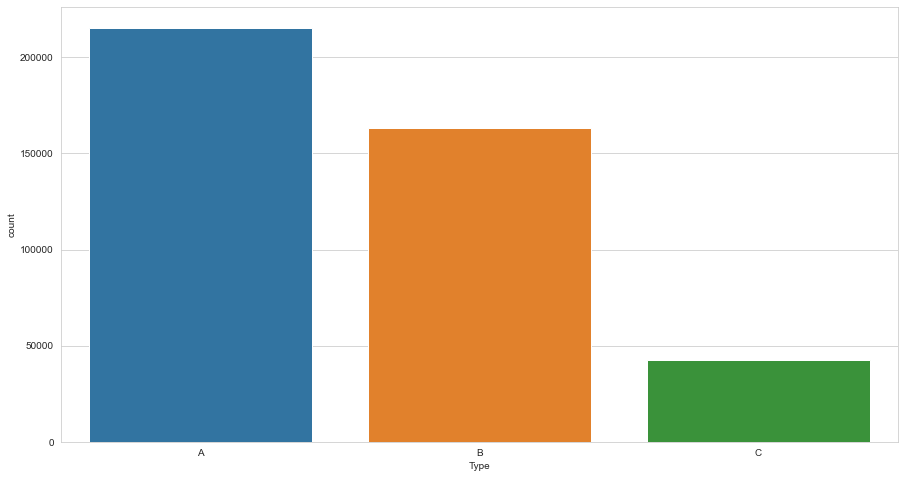

In [72]:
plt.figure(figsize=(15,8))
# plot the count of stores per type
sns.countplot(data.Type)

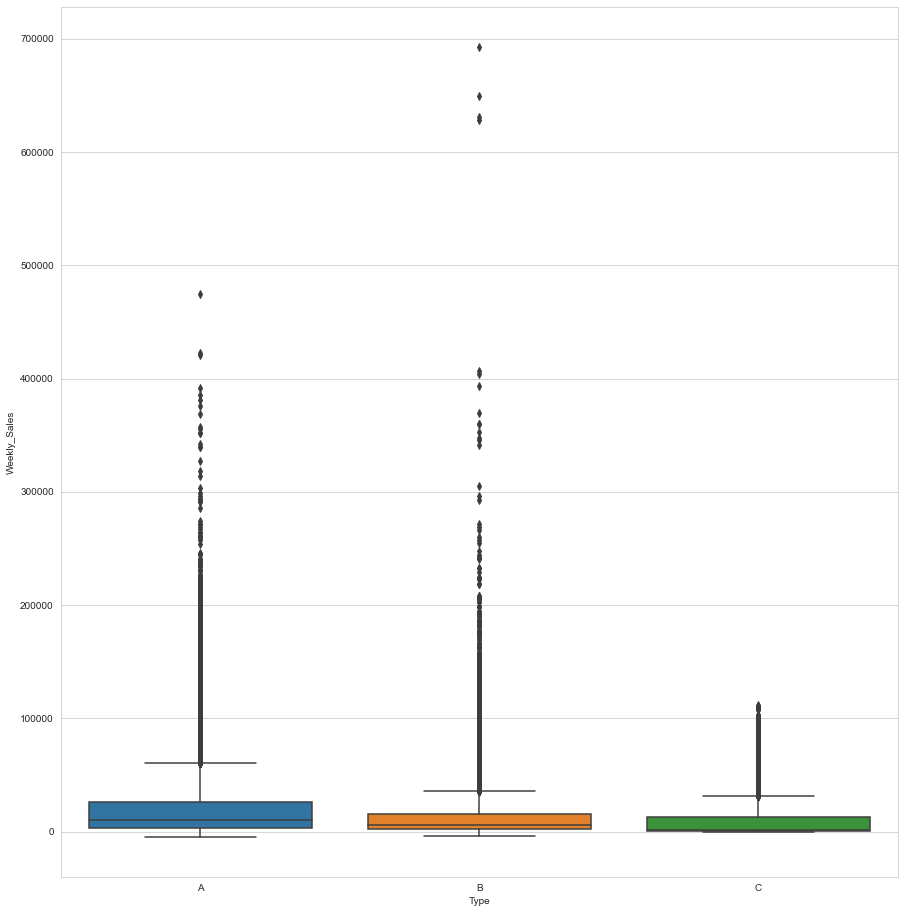

In [73]:
plt.figure(figsize=(15,16))
# plot the weekly sales of stores per type
sns.boxplot(data = data,y="Weekly_Sales",x="Type")

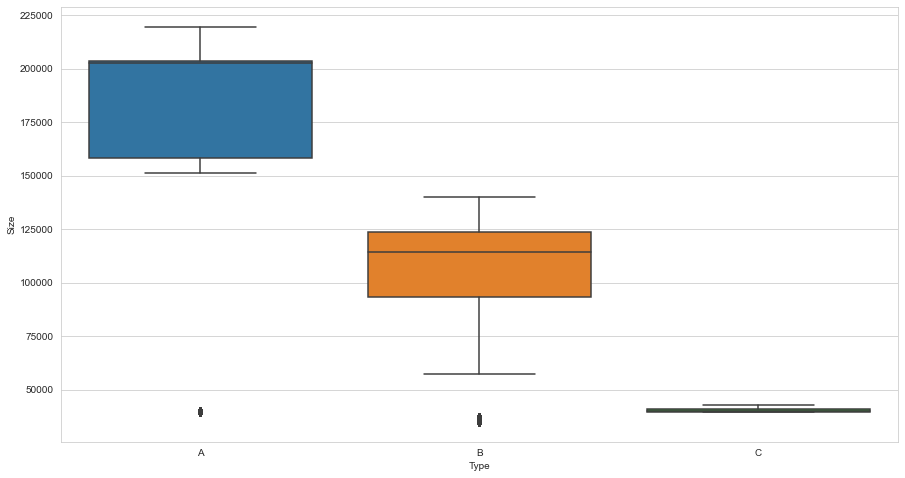

In [74]:
plt.figure(figsize=(15,8))
# plot the size of stores per type
sns.boxplot(data = data,y="Size",x="Type")

Inference 
+ Overall weekly sales of store A is high, followed by B and then C.
+ Type A & B store show spike during holidays whereas Type C is consistent over every month and doesnot show much deviation.
+ Store Count is in the order A, followed by B and then C
+ Size wise store A has most no of Items followed by B and then C
+ Store B had the highest weekly sale.  

### Department wise Analysis

In [75]:
len(data["Dept"].unique())

81

In [76]:
sales_by_dept = data.groupby(by=['Dept'], as_index=False)['Weekly_Sales'].sum()
sales_by_dept.head()

,Dept,Weekly_Sales
0,1,1.236388e+08
1,2,2.806112e+08
2,3,7.589245e+07
3,4,1.671467e+08
4,5,1.356074e+08


Text(0.5, 0, 'Department')

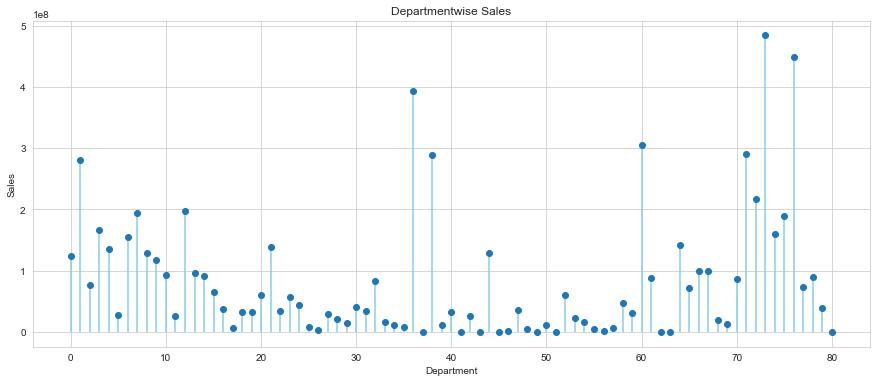

In [77]:
fig1, ax1 = plt.subplots(figsize=(15, 6))
plt.vlines(x=sales_by_dept.index, ymin=0, ymax=sales_by_dept['Weekly_Sales'], color='skyblue')
plt.plot(sales_by_dept.index,sales_by_dept['Weekly_Sales'], "o")
plt.title("Departmentwise Sales")
plt.ylabel("Sales")
plt.xlabel("Department")

Inference : 
+ Departments 36, 73 and 76 show higher weekly sales.

### Ploting other fields against date

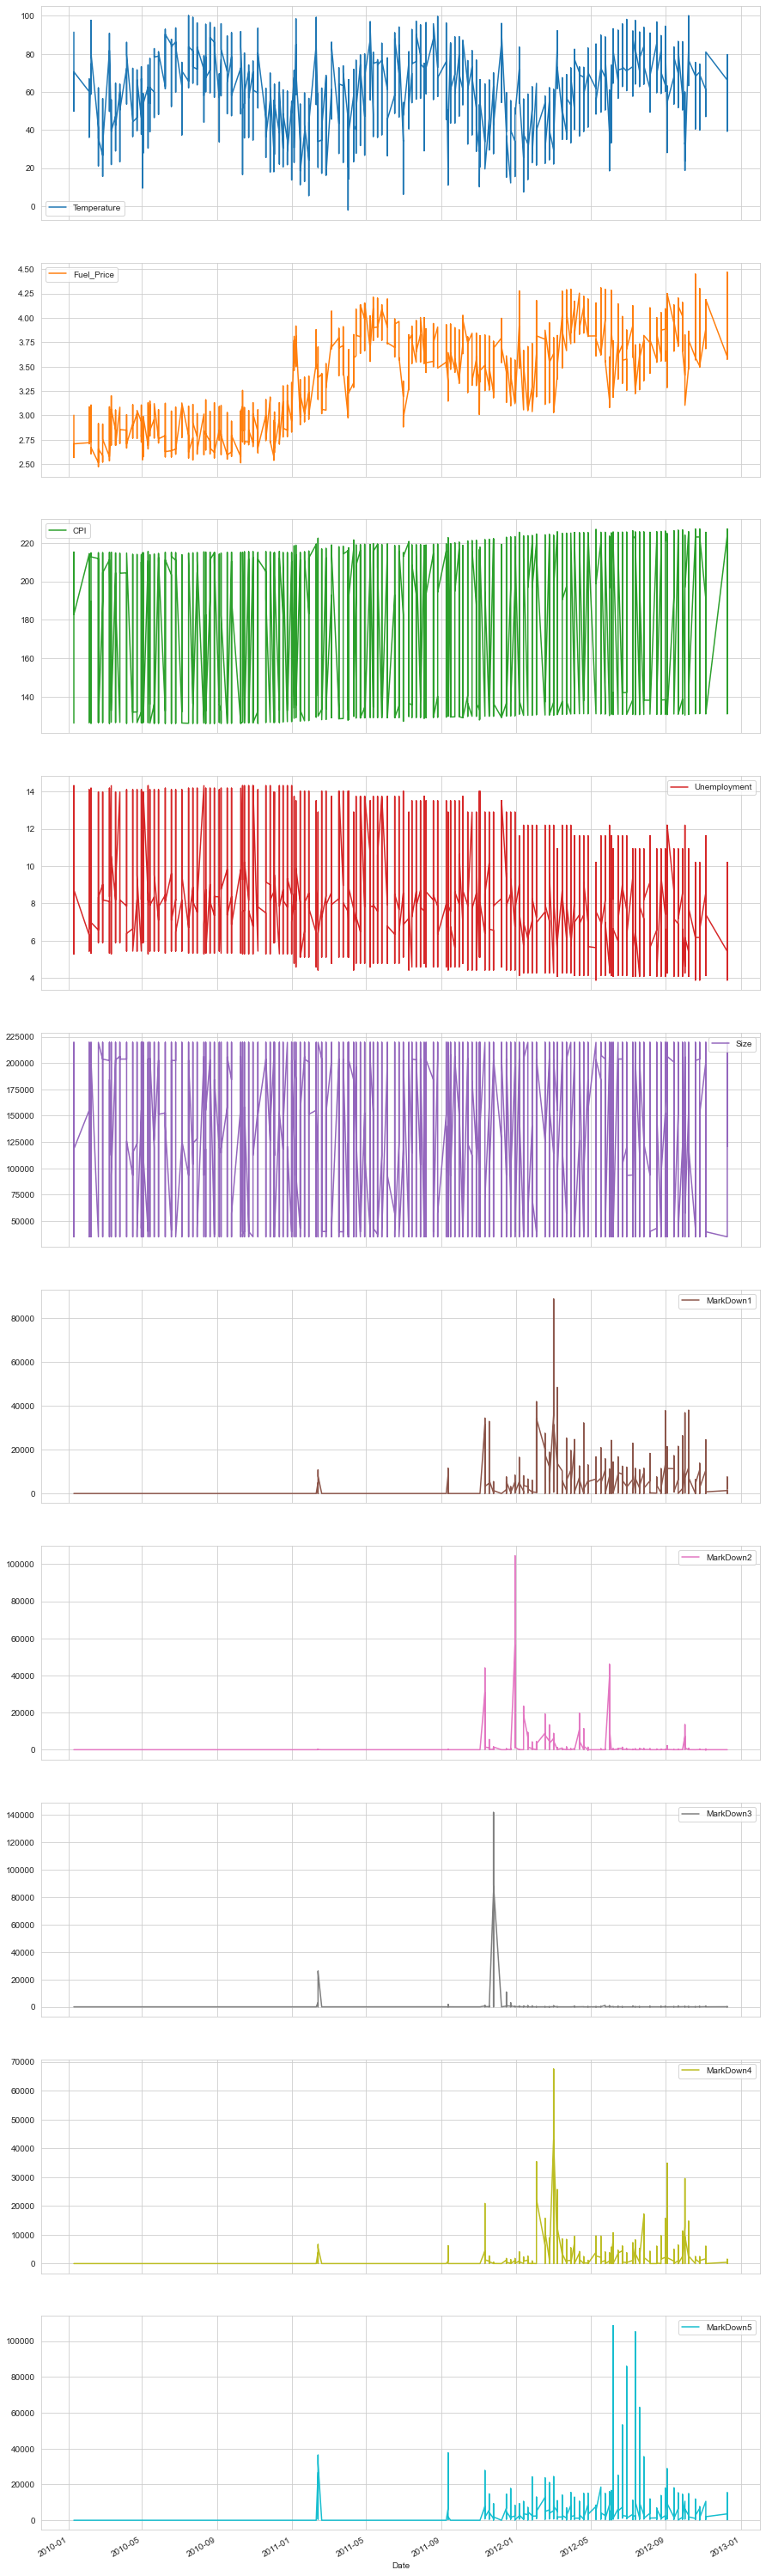

In [78]:
data[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Size' ,
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(15,60))
plt.show()

Inference : 
+ Fuel Price and Consumer Price Index shown growth over the year.
+ Unemployment decreased year after year.

### Correlation Matrix & Heatmap

In [79]:
df = data.corr()
print(df)

                 Store      Dept  Weekly_Sales  IsHoliday  Temperature  \
Store         1.000000  0.024004     -0.085195  -0.000548    -0.050097   
Dept          0.024004  1.000000      0.148032   0.000916     0.004437   
Weekly_Sales -0.085195  0.148032      1.000000   0.012774    -0.002312   
IsHoliday    -0.000548  0.000916      0.012774   1.000000    -0.155949   
Temperature  -0.050097  0.004437     -0.002312  -0.155949     1.000000   
Fuel_Price    0.065290  0.003572     -0.000120  -0.078281     0.143859   
MarkDown1    -0.059844  0.001494      0.047172  -0.003521    -0.026415   
MarkDown2    -0.033829  0.000587      0.020716   0.207604    -0.179672   
MarkDown3    -0.020331  0.001475      0.038562   0.266471    -0.056026   
MarkDown4    -0.042724  0.001937      0.037467   0.011565    -0.050281   
MarkDown5    -0.012452  0.002668      0.050465  -0.015235    -0.014752   
CPI          -0.211088 -0.007477     -0.020921  -0.001944     0.182112   
Unemployment  0.208552  0.007837     -

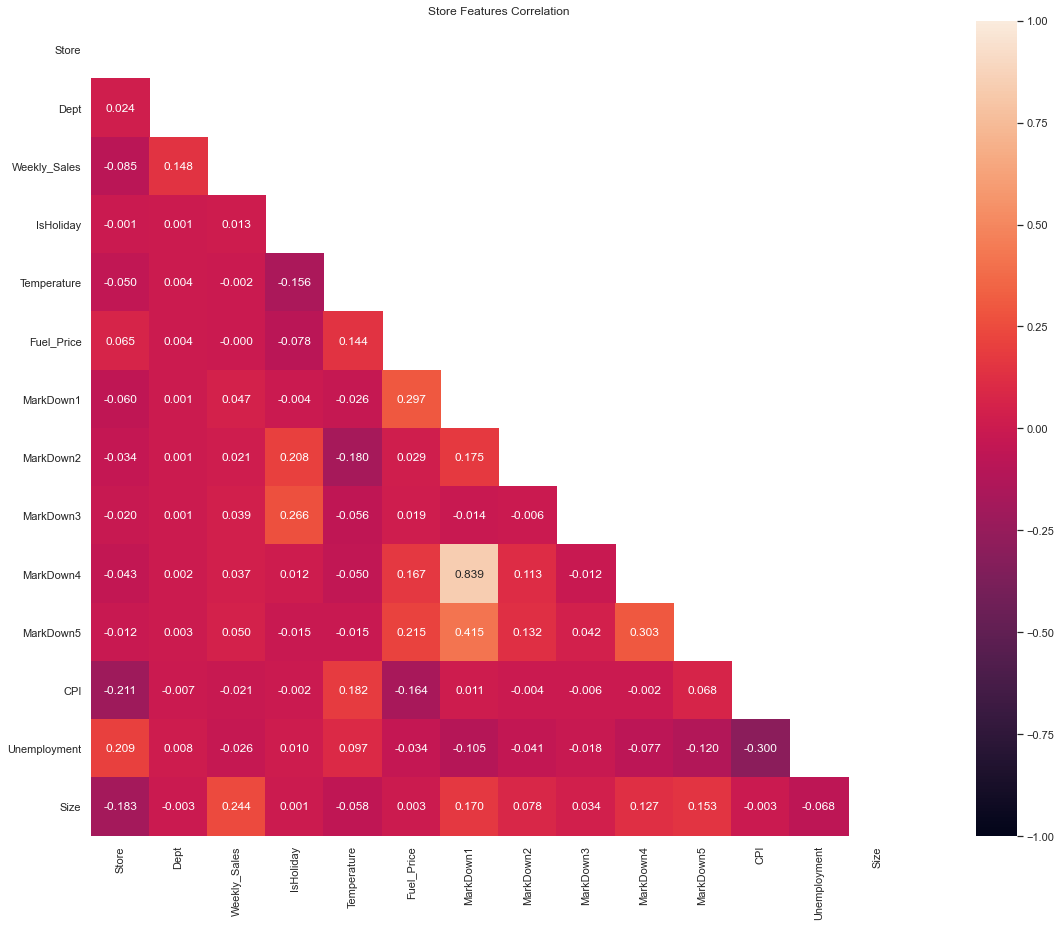

In [80]:
mask = np.zeros_like(df)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25,15))
    plt.title('Store Features Correlation')
    ax = sns.heatmap(df, mask=mask, vmax=1, vmin=-1, square=True,annot=True, fmt=".3f",xticklabels=df.columns.values,yticklabels=df.columns.values)

Inference : 
+ Highly positive Correlation between MarkDown 1 and MarkDown 4
+ Weekly sales doesnot show any high correlation with any other parameters.
+ CPI and Unemployment/Store shows negative correlation.